# **Training Auto-encoder and classification on MNIST dataset**

## **Download Dataset**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

print("Training Dataset Size:", len(train_dataset))
print("Testing Dataset Size:", len(test_dataset))

sample_image, label = train_dataset[0]
print("Flattened Vector:", sample_image)
print("Dimensions:", sample_image.shape)  # Should be torch.Size([784])
print("Label:", label)


100%|██████████| 9.91M/9.91M [00:00<00:00, 11.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 337kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.14MB/s]

Training Dataset Size: 60000
Testing Dataset Size: 10000
Flattened Vector: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.000

## **Design and Implementation of Auto-Encoders**

### **Design auto-encoders**

In [4]:
class AutoEncoder8(nn.Module):
    def __init__(self):
        super(AutoEncoder8, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 8),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(8, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



class AutoEncoder4(nn.Module):
    def __init__(self):
        super(AutoEncoder4, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 4),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(4, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

### **Training auto-encoders**


Training AutoEncoder with 8 output neurons
Epoch [1/50], Loss: 0.042691
Epoch [2/50], Loss: 0.031858
Epoch [3/50], Loss: 0.029795
Epoch [4/50], Loss: 0.028844
Epoch [5/50], Loss: 0.028204
Epoch [6/50], Loss: 0.027732
Epoch [7/50], Loss: 0.027357
Epoch [8/50], Loss: 0.027062
Epoch [9/50], Loss: 0.026819
Epoch [10/50], Loss: 0.026626
Epoch [11/50], Loss: 0.026450
Epoch [12/50], Loss: 0.026289
Epoch [13/50], Loss: 0.026158
Epoch [14/50], Loss: 0.026034
Epoch [15/50], Loss: 0.025923
Epoch [16/50], Loss: 0.025803
Epoch [17/50], Loss: 0.025704
Epoch [18/50], Loss: 0.025615
Epoch [19/50], Loss: 0.025529
Epoch [20/50], Loss: 0.025447
Epoch [21/50], Loss: 0.025366
Epoch [22/50], Loss: 0.025300
Epoch [23/50], Loss: 0.025241
Epoch [24/50], Loss: 0.025175
Epoch [25/50], Loss: 0.025110
Epoch [26/50], Loss: 0.025053
Epoch [27/50], Loss: 0.025000
Epoch [28/50], Loss: 0.024948
Epoch [29/50], Loss: 0.024894
Epoch [30/50], Loss: 0.024847
Epoch [31/50], Loss: 0.024793
Epoch [32/50], Loss: 0.024752
Epoch 

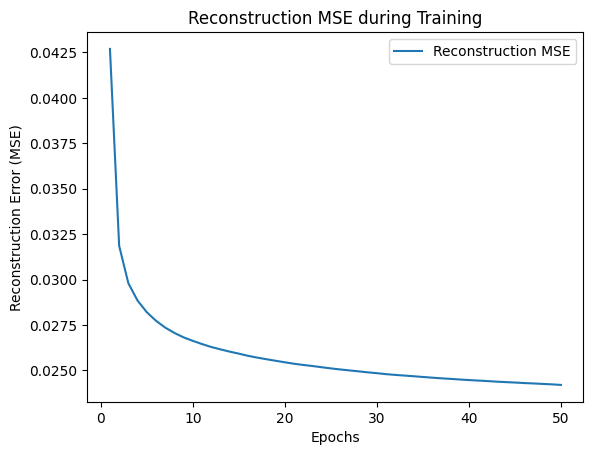


Training AutoEncoder with 4 output neurons
Epoch [1/50], Loss: 0.051928
Epoch [2/50], Loss: 0.040756
Epoch [3/50], Loss: 0.038220
Epoch [4/50], Loss: 0.036952
Epoch [5/50], Loss: 0.035997
Epoch [6/50], Loss: 0.035327
Epoch [7/50], Loss: 0.034844
Epoch [8/50], Loss: 0.034458
Epoch [9/50], Loss: 0.034154
Epoch [10/50], Loss: 0.033888
Epoch [11/50], Loss: 0.033661
Epoch [12/50], Loss: 0.033478
Epoch [13/50], Loss: 0.033303
Epoch [14/50], Loss: 0.033156
Epoch [15/50], Loss: 0.033015
Epoch [16/50], Loss: 0.032906
Epoch [17/50], Loss: 0.032792
Epoch [18/50], Loss: 0.032686
Epoch [19/50], Loss: 0.032596
Epoch [20/50], Loss: 0.032514
Epoch [21/50], Loss: 0.032425
Epoch [22/50], Loss: 0.032338
Epoch [23/50], Loss: 0.032276
Epoch [24/50], Loss: 0.032198
Epoch [25/50], Loss: 0.032134
Epoch [26/50], Loss: 0.032065
Epoch [27/50], Loss: 0.032014
Epoch [28/50], Loss: 0.031946
Epoch [29/50], Loss: 0.031902
Epoch [30/50], Loss: 0.031837
Epoch [31/50], Loss: 0.031782
Epoch [32/50], Loss: 0.031733
Epoch

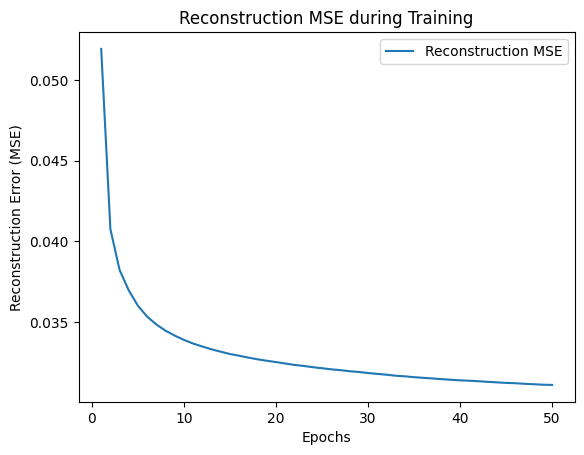

In [9]:
def train_autoencoder(model, train_loader, epochs=50, learning_rate=0.0005):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    mse_values = []

    for epoch in range(epochs):
        total_loss = 0
        for images, _ in train_loader:
            images = images.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, images)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        mse_values.append(total_loss / len(train_loader))
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.6f}")

    plt.plot(range(1, epochs + 1), mse_values, label="Reconstruction MSE")
    plt.xlabel("Epochs")
    plt.ylabel("Reconstruction Error (MSE)")
    plt.title("Reconstruction MSE during Training")
    plt.legend()
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#AutoEncoder8
autoencoder_8 = AutoEncoder8().to(device)
print("Training AutoEncoder with 8 output neurons")
train_autoencoder(autoencoder_8, train_loader)

#AutoEncoder4
autoencoder_4 = AutoEncoder4().to(device)
print("\nTraining AutoEncoder with 4 output neurons")
train_autoencoder(autoencoder_4, train_loader)



### **Count auto-encoder parameters**

In [10]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Number of parameters in AutoEncoder8: {count_parameters(autoencoder_8)}")
print(f"Number of parameters in AutoEncoder4: {count_parameters(autoencoder_4)}")

Number of parameters in AutoEncoder8: 203800
Number of parameters in AutoEncoder4: 202772


### **Classification with Auto-Encoders**

In [12]:
class ClassifierFromAutoEncoder(nn.Module):
    def __init__(self, autoencoder, encoder_size):
        super(ClassifierFromAutoEncoder, self).__init__()


        self.encoder = autoencoder.encoder

        # Freeze encoder
        for param in self.encoder.parameters():
            param.requires_grad = False


        if encoder_size == 8:
            self.classifier = nn.Sequential(
                nn.Linear(8, 4),
                nn.ReLU(),
                nn.Linear(4, 10)
            )
        elif encoder_size == 4:
            self.classifier = nn.Sequential(
                nn.Linear(4, 10)
            )

    def forward(self, x):
        features = self.encoder(x)
        features = features.view(features.size(0), -1)
        output = self.classifier(features)
        return output


In [20]:
def train_classifier(model, train_loader, test_loader, epochs=50, learning_rate=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.classifier.parameters(), lr=learning_rate)

    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct_train = 0
        total_train = 0

        # Training
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_accuracy = 100 * correct_train / total_train

        # Test
        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                correct_test += (predicted == labels).sum().item()
                total_test += labels.size(0)

        test_accuracy = 100 * correct_test / total_test

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.6f}, "
              f"Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

    plt.plot(range(1, epochs+1), train_accuracies, label="Train Accuracy")
    plt.plot(range(1, epochs+1), test_accuracies, label="Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Training and Test datasets' Accuracy")
    plt.legend()
    plt.show()



Training Classifier with 8-Neuron auto-encoder
Epoch [1/50], Loss: 0.746914, Train Accuracy: 74.54%, Test Accuracy: 81.37%
Epoch [2/50], Loss: 0.586413, Train Accuracy: 80.16%, Test Accuracy: 80.27%
Epoch [3/50], Loss: 0.574231, Train Accuracy: 80.48%, Test Accuracy: 81.33%
Epoch [4/50], Loss: 0.570591, Train Accuracy: 80.72%, Test Accuracy: 81.11%
Epoch [5/50], Loss: 0.569754, Train Accuracy: 80.73%, Test Accuracy: 81.76%
Epoch [6/50], Loss: 0.567394, Train Accuracy: 80.92%, Test Accuracy: 80.71%
Epoch [7/50], Loss: 0.567601, Train Accuracy: 80.86%, Test Accuracy: 80.72%
Epoch [8/50], Loss: 0.566379, Train Accuracy: 80.99%, Test Accuracy: 80.60%
Epoch [9/50], Loss: 0.565407, Train Accuracy: 81.14%, Test Accuracy: 81.19%
Epoch [10/50], Loss: 0.564775, Train Accuracy: 81.13%, Test Accuracy: 81.66%
Epoch [11/50], Loss: 0.566414, Train Accuracy: 81.03%, Test Accuracy: 80.73%
Epoch [12/50], Loss: 0.565583, Train Accuracy: 81.32%, Test Accuracy: 81.73%
Epoch [13/50], Loss: 0.561272, Train 

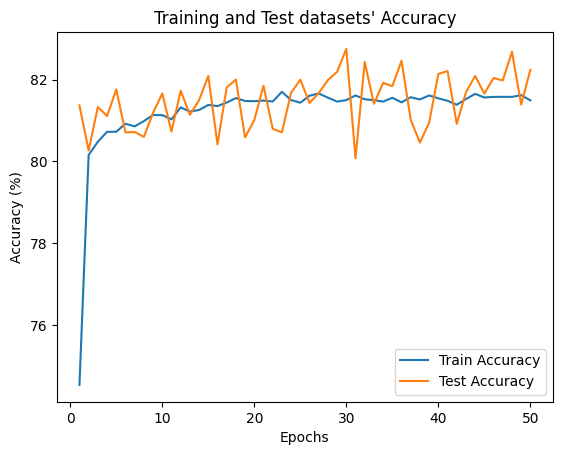


Training Classifier with 4-Neuron auto-encoder
Epoch [1/50], Loss: 1.026954, Train Accuracy: 68.49%, Test Accuracy: 76.54%
Epoch [2/50], Loss: 0.744202, Train Accuracy: 77.04%, Test Accuracy: 77.40%
Epoch [3/50], Loss: 0.722210, Train Accuracy: 77.75%, Test Accuracy: 78.18%
Epoch [4/50], Loss: 0.717406, Train Accuracy: 78.13%, Test Accuracy: 77.70%
Epoch [5/50], Loss: 0.714164, Train Accuracy: 78.37%, Test Accuracy: 77.91%
Epoch [6/50], Loss: 0.713933, Train Accuracy: 78.40%, Test Accuracy: 77.89%
Epoch [7/50], Loss: 0.713006, Train Accuracy: 78.38%, Test Accuracy: 78.11%
Epoch [8/50], Loss: 0.713311, Train Accuracy: 78.36%, Test Accuracy: 77.99%
Epoch [9/50], Loss: 0.712620, Train Accuracy: 78.42%, Test Accuracy: 78.04%
Epoch [10/50], Loss: 0.712696, Train Accuracy: 78.40%, Test Accuracy: 78.68%
Epoch [11/50], Loss: 0.713232, Train Accuracy: 78.42%, Test Accuracy: 78.37%
Epoch [12/50], Loss: 0.712614, Train Accuracy: 78.39%, Test Accuracy: 78.67%
Epoch [13/50], Loss: 0.712166, Train 

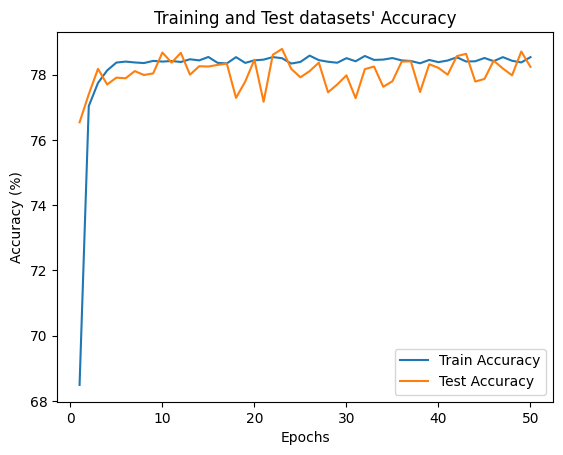

In [21]:
classifier_8 = ClassifierFromAutoEncoder(autoencoder_8, encoder_size=8).to(device)
classifier_4 = ClassifierFromAutoEncoder(autoencoder_4, encoder_size=4).to(device)


print("\nTraining Classifier with 8-Neuron auto-encoder")
train_classifier(classifier_8, train_loader, test_loader)

print("\nTraining Classifier with 4-Neuron auto-encoder")
train_classifier(classifier_4, train_loader, test_loader)


### **Count Classifyer parameters**

In [23]:
def count_total_parameters(model):
    return sum(p.numel() for p in model.parameters())


print(f"Number of parameters in Classifier8: {count_total_parameters(classifier_8)}")
print(f"Number of parameters in Classifier4: {count_total_parameters(classifier_4)}")

Number of parameters in Classifier8: 101598
Number of parameters in Classifier4: 101046


## **Bonus: Improving the model**

### **Design 3-layer auto-encoder**

In [37]:
class AutoEncoder16(nn.Module):
    def __init__(self):
        super(AutoEncoder16, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 784)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Training AutoEncoder with 16 output neurons
Epoch [1/25], Loss: 0.038151
Epoch [2/25], Loss: 0.024493
Epoch [3/25], Loss: 0.021952
Epoch [4/25], Loss: 0.020542
Epoch [5/25], Loss: 0.019675
Epoch [6/25], Loss: 0.019061
Epoch [7/25], Loss: 0.018561
Epoch [8/25], Loss: 0.018150
Epoch [9/25], Loss: 0.017809
Epoch [10/25], Loss: 0.017518
Epoch [11/25], Loss: 0.017266
Epoch [12/25], Loss: 0.017030
Epoch [13/25], Loss: 0.016830
Epoch [14/25], Loss: 0.016653
Epoch [15/25], Loss: 0.016494
Epoch [16/25], Loss: 0.016337
Epoch [17/25], Loss: 0.016202
Epoch [18/25], Loss: 0.016077
Epoch [19/25], Loss: 0.015967
Epoch [20/25], Loss: 0.015855
Epoch [21/25], Loss: 0.015751
Epoch [22/25], Loss: 0.015656
Epoch [23/25], Loss: 0.015570
Epoch [24/25], Loss: 0.015483
Epoch [25/25], Loss: 0.015410


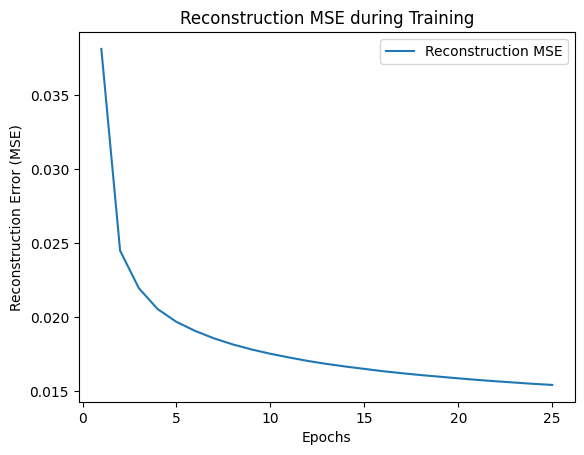

In [25]:
#AutoEncoder16
autoencoder_16 = AutoEncoder16().to(device)
print("Training AutoEncoder with 16 output neurons")
train_autoencoder(autoencoder_16, train_loader, epochs=25)

In [26]:
# Auto-encoder size
print(f"Number of parameters in AutoEncoder16: {count_parameters(autoencoder_16)}")

Number of parameters in AutoEncoder16: 437664


### **Design classifier model**

In [47]:
class ClassifierFromAutoEncoder16(nn.Module):
    def __init__(self, autoencoder):
        super(ClassifierFromAutoEncoder16, self).__init__()

        self.encoder = autoencoder.encoder

        # Freeze encoder weights
        for param in self.encoder.parameters():
            param.requires_grad = False

        self.classifier = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 10),
        )

    def forward(self, x):
        features = self.encoder(x)
        output = self.classifier(features)
        return output


Training Classifier with 16-Neuron auto-encoder
Epoch [1/25], Loss: 0.601132, Train Accuracy: 80.67%, Test Accuracy: 91.63%
Epoch [2/25], Loss: 0.454068, Train Accuracy: 85.49%, Test Accuracy: 91.10%
Epoch [3/25], Loss: 0.433490, Train Accuracy: 86.15%, Test Accuracy: 91.82%
Epoch [4/25], Loss: 0.417345, Train Accuracy: 86.50%, Test Accuracy: 91.50%
Epoch [5/25], Loss: 0.410188, Train Accuracy: 86.80%, Test Accuracy: 92.16%
Epoch [6/25], Loss: 0.407022, Train Accuracy: 86.96%, Test Accuracy: 92.48%
Epoch [7/25], Loss: 0.398422, Train Accuracy: 87.24%, Test Accuracy: 92.25%
Epoch [8/25], Loss: 0.400474, Train Accuracy: 87.27%, Test Accuracy: 92.05%
Epoch [9/25], Loss: 0.395945, Train Accuracy: 87.20%, Test Accuracy: 92.18%
Epoch [10/25], Loss: 0.390565, Train Accuracy: 87.45%, Test Accuracy: 92.94%
Epoch [11/25], Loss: 0.387796, Train Accuracy: 87.60%, Test Accuracy: 92.47%
Epoch [12/25], Loss: 0.388559, Train Accuracy: 87.53%, Test Accuracy: 92.40%
Epoch [13/25], Loss: 0.388334, Train

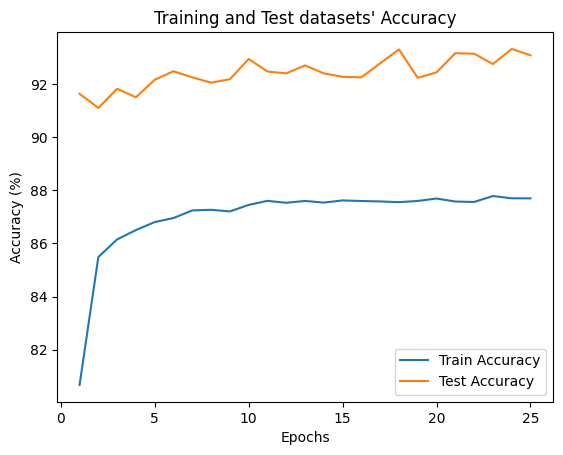

In [48]:
classifier_16 = ClassifierFromAutoEncoder16(autoencoder_16).to(device)

print("\nTraining Classifier with 16-Neuron auto-encoder")
train_classifier(classifier_16, train_loader, test_loader, epochs=25)

In [49]:
print(f"Number of parameters in Classifier16: {count_total_parameters(classifier_16)}")


Number of parameters in Classifier16: 219322
